In [41]:
import pandas as pd
import math
import seaborn as sns
from datetime import datetime

In [11]:
raw_data_path = 'Raw_Data/'
processed_data_path = 'Processed_Data/'
links_data_path = 'Data_Links/'

# Crime Data

In [3]:
df = pd.read_csv(raw_data_path+'nypd_data.csv')

In [4]:
df.describe()

ARREST_KEY         PD_CD         KY_CD  ARREST_PRECINCT  \
count  5.012956e+06  5.012695e+06  5.003927e+06     5.012956e+06   
mean   9.579149e+07  5.117004e+02  3.016261e+02     6.062439e+01   
std    5.222361e+07  2.633719e+02  1.817349e+02     3.430862e+01   
min    9.926901e+06  0.000000e+00  1.010000e+02     1.000000e+00   
25%    5.931854e+07  2.930000e+02  1.260000e+02     3.300000e+01   
50%    8.345894e+07  5.110000e+02  3.410000e+02     6.000000e+01   
75%    1.435467e+08  7.500000e+02  3.480000e+02     8.400000e+01   
max    2.068936e+08  9.970000e+02  9.950000e+02     1.230000e+02   

       JURISDICTION_CODE    X_COORD_CD    Y_COORD_CD      Latitude  \
count       5.012946e+06  5.012955e+06  5.012955e+06  5.012955e+06   
mean        1.304714e+00  1.005357e+06  2.149659e+05  4.075649e+01   
std         9.427788e+00  1.999599e+04  1.648721e+05  4.456872e-01   
min         0.000000e+00  9.133570e+05  1.211310e+05  4.049891e+01   
25%         0.000000e+00  9.933700e+05  1.868860e+05  4.067957e+01   
50%         0.000000e+00  1.004890e+06  2.094910e+05  4.074166e+01   
75%         0.000000e+00  1.015835e+06  2.366140e+05  4.081609e+01   
max         9.700000e+01  1.067302e+06  8.202360e+06  6.208307e+01   

          Longitude  
count  5.012955e+06  
mean  -7.392378e+01  
std    7.216800e-02  
min   -7.425494e+01  
25%   -7.396707e+01  
50%   -7.392549e+01  
75%   -7.388586e+01  
max   -7.368178e+01

In [5]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

In [6]:
df.head()

ARREST_KEY ARREST_DATE  PD_CD                   PD_DESC  KY_CD  \
0   190294601  11/23/2018  109.0  ASSAULT 2,1,UNCLASSIFIED  106.0   
1   190266280  11/21/2018  665.0                       NaN    NaN   
2   190159521  11/19/2018  101.0                 ASSAULT 3  344.0   
3   190080571  11/16/2018  475.0                       NaN    NaN   
4   190027735  11/15/2018  475.0                       NaN    NaN   

                      OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0                FELONY ASSAULT  PL 1200512          F           B   
1                           NaN  PL 4902001          F           Q   
2  ASSAULT 3 & RELATED OFFENSES  PL 1200000          M           K   
3                           NaN  PL 1651601          M           Q   
4                           NaN  PL 1651601          M           M   

   ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX       PERP_RACE  \
0               40                0.0     25-44        M           BLACK   
1              109                0.0     25-44        M  BLACK HISPANIC   
2               77                0.0     25-44        M           BLACK   
3              103                1.0     18-24        M           BLACK   
4               10                1.0     45-64        M  WHITE HISPANIC   

   X_COORD_CD  Y_COORD_CD   Latitude  Longitude  \
0   1008096.0    233595.0  40.807816 -73.913863   
1   1032084.0    216954.0  40.762044 -73.827330   
2   1003508.0    185056.0  40.674600 -73.930575   
3   1039726.0    195270.0  40.702482 -73.799922   
4    984669.0    210807.0  40.745301 -73.998489   

                                         Lon_Lat  
0  POINT (-73.91386266099995 40.807816227000046)  
1  POINT (-73.82732958099997 40.762043893000055)  
2   POINT (-73.93057482199998 40.67459999000005)  
3       POINT (-73.799922252 40.702482133000046)  
4  POINT (-73.99848931699995 40.745301320000074)

In [16]:
df['year of crime'] = list(map(lambda x: str(x.split('/')[2]),df['ARREST_DATE'].values))
df['month of crime'] = list(map(lambda x: str(x.split('/')[0]),df['ARREST_DATE'].values))
df.head()

ARREST_KEY ARREST_DATE  PD_CD                   PD_DESC  KY_CD  \
0   190294601  11/23/2018  109.0  ASSAULT 2,1,UNCLASSIFIED  106.0   
1   190266280  11/21/2018  665.0                       NaN    NaN   
2   190159521  11/19/2018  101.0                 ASSAULT 3  344.0   
3   190080571  11/16/2018  475.0                       NaN    NaN   
4   190027735  11/15/2018  475.0                       NaN    NaN   

                      OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0                FELONY ASSAULT  PL 1200512          F           B   
1                           NaN  PL 4902001          F           Q   
2  ASSAULT 3 & RELATED OFFENSES  PL 1200000          M           K   
3                           NaN  PL 1651601          M           Q   
4                           NaN  PL 1651601          M           M   

   ARREST_PRECINCT  ...  AGE_GROUP PERP_SEX       PERP_RACE X_COORD_CD  \
0               40  ...      25-44        M           BLACK  1008096.0   
1              109  ...      25-44        M  BLACK HISPANIC  1032084.0   
2               77  ...      25-44        M           BLACK  1003508.0   
3              103  ...      18-24        M           BLACK  1039726.0   
4               10  ...      45-64        M  WHITE HISPANIC   984669.0   

   Y_COORD_CD   Latitude  Longitude  \
0    233595.0  40.807816 -73.913863   
1    216954.0  40.762044 -73.827330   
2    185056.0  40.674600 -73.930575   
3    195270.0  40.702482 -73.799922   
4    210807.0  40.745301 -73.998489   

                                         Lon_Lat year of crime month of crime  
0  POINT (-73.91386266099995 40.807816227000046)          2018             11  
1  POINT (-73.82732958099997 40.762043893000055)          2018             11  
2   POINT (-73.93057482199998 40.67459999000005)          2018             11  
3       POINT (-73.799922252 40.702482133000046)          2018             11  
4  POINT (-73.99848931699995 40.745301320000074)          2018             11  

[5 rows x 21 columns]

In [95]:
cts = df.groupby('ARREST_PRECINCT').agg(['count'])['ARREST_KEY']

In [22]:
cts.head()

count
ARREST_PRECINCT       
1                61125
5                75750
6                54654
7                45390
9                52728

In [96]:
cts.reset_index(level=0, inplace=True)
cts.head()

ARREST_PRECINCT  count
0                1  61125
1                5  75750
2                6  54654
3                7  45390
4                9  52728

In [13]:
df_taxi_with_precint = pd.read_csv(links_data_path+'taxi_with_precint.csv')
df_taxi_with_precint['Corresponding_Taxi_Zones'] = list( map(lambda x: list(map(int,x.split('|'))),df_taxi_with_precint['Corresponding_Taxi_Zones'].values))
df_taxi_with_precint.head()

NYPD Precinct                   Corresponding_Taxi_Zones
0              1  [209, 87, 88, 12, 13, 231, 261, 211, 125]
1              5                                  [45, 144]
2              6                       [158, 249, 113, 114]
3              7                                 [232, 148]
4              9                                    [4, 79]

In [ ]:
#df_df_taxi_with_precint.explode('Corresponding_Taxi_Zones')

In [97]:
cts = cts.merge(df_taxi_with_precint,left_on = 'ARREST_PRECINCT',right_on = 'NYPD Precinct')
cts.head()

ARREST_PRECINCT  count  NYPD Precinct  \
0                1  61125              1   
1                5  75750              5   
2                6  54654              6   
3                7  45390              7   
4                9  52728              9   

                    Corresponding_Taxi_Zones  
0  [209, 87, 88, 12, 13, 231, 261, 211, 125]  
1                                  [45, 144]  
2                       [158, 249, 113, 114]  
3                                 [232, 148]  
4                                    [4, 79]

In [99]:
cts['CrimeRate'] = 1
cts['CrimeRate'][cts['count']<45000] = 'Low Crime'
cts['CrimeRate'][(cts['count']>=45000) & (cts['count']<90000)] = 'Medium Crime'
cts['CrimeRate'][cts['count']>=90000] = 'High Crime'
cts.head()

c:\users\risha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\risha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\risha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

ARREST_PRECINCT  count  NYPD Precinct  \
0                1  61125              1   
1                5  75750              5   
2                6  54654              6   
3                7  45390              7   
4                9  52728              9   

                    Corresponding_Taxi_Zones     CrimeRate  
0  [209, 87, 88, 12, 13, 231, 261, 211, 125]  Medium Crime  
1                                  [45, 144]  Medium Crime  
2                       [158, 249, 113, 114]  Medium Crime  
3                                 [232, 148]  Medium Crime  
4                                    [4, 79]  Medium Crime

In [100]:
cts = cts.explode('Corresponding_Taxi_Zones')
cts.head()

ARREST_PRECINCT  count  NYPD Precinct Corresponding_Taxi_Zones  \
0                1  61125              1                      209   
0                1  61125              1                       87   
0                1  61125              1                       88   
0                1  61125              1                       12   
0                1  61125              1                       13   

      CrimeRate  
0  Medium Crime  
0  Medium Crime  
0  Medium Crime  
0  Medium Crime  
0  Medium Crime

In [8]:

df_taxi_with_precint.to_csv(processed_data_path+'taxi_with_precint.csv')

# UNI

In [30]:
df_uni = pd.read_csv(raw_data_path+'cuny_locations.csv')
df_uni_lookup = pd.read_csv(links_data_path+'taxi_with_cuny.csv')
df_uni_lookup.head()

College ID  Location ID
0           0          137
1           1          231
2           2           94
3           3          165
4           4          251

In [ ]:
df_uni.to_csv(processed_data_path +'cuny_location.csv')
df_taxi_with_cuny.to_csv(processed_data_path+'taxi_with_cuny.csv')

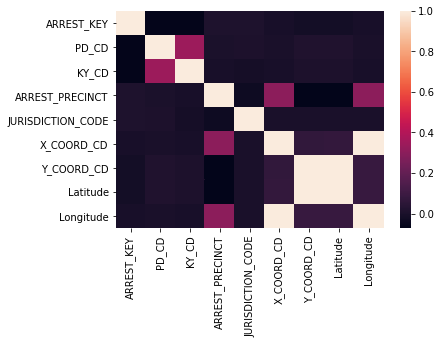

In [9]:
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns)

In [31]:
df_taxi = pd.read_csv(raw_data_path+'yellowtaxi_data.csv')
df_taxi.describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  7.433139e+06     7.433139e+06   7.433139e+06  7.433139e+06   
mean   1.636259e+00     1.573301e+00   2.998019e+00  1.057416e+00   
std    5.071082e-01     1.224597e+00   3.908213e+00  7.037535e-01   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.000000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.640000e+00  1.000000e+00   
75%    2.000000e+00     2.000000e+00   3.050000e+00  1.000000e+00   
max    4.000000e+00     9.000000e+00   8.309000e+02  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  7.433139e+06  7.433139e+06  7.433139e+06  7.433139e+06  7.433139e+06   
mean   1.633672e+02  1.615346e+02  1.288608e+00  1.319433e+01  1.212602e+00   
std    6.615664e+01  7.037945e+01  4.761804e-01  1.457199e+02  1.288626e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00 -4.500800e+02 -2.460000e+01   
25%    1.160000e+02  1.070000e+02  1.000000e+00  6.500000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  9.500000e+00  5.000000e-01   
75%    2.330000e+02  2.340000e+02  2.000000e+00  1.450000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  3.958399e+05  2.000000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  7.433139e+06  7.433139e+06  7.433139e+06           7.433139e+06   
mean   4.957358e-01  2.212688e+00  3.821195e-01           2.988961e-01   
std    5.482860e-02  2.772410e+00  1.718031e+00           2.486543e-02   
min   -5.000000e-01 -8.800000e+01 -2.300000e+01          -3.000000e-01   
25%    5.000000e-01  0.000000e+00  0.000000e+00           3.000000e-01   
50%    5.000000e-01  1.950000e+00  0.000000e+00           3.000000e-01   
75%    5.000000e-01  2.960000e+00  0.000000e+00           3.000000e-01   
max    2.745000e+01  4.408000e+02  8.125900e+02           1.000000e+00   

       total_amount  congestion_surcharge  
count  7.433139e+06          7.433139e+06  
mean   1.922981e+01          2.291299e+00  
std    1.459684e+02          7.017208e-01  
min   -4.508800e+02         -2.500000e+00  
25%    1.130000e+01          2.500000e+00  
50%    1.476000e+01          2.500000e+00  
75%    2.075000e+01          2.500000e+00  
max    3.958412e+05          2.750000e+00

In [33]:
len(df_taxi)

7433139

In [34]:
len(df_taxi[df_taxi['trip_distance']<=0].index)

50657

In [35]:
df_taxi = df_taxi.drop(df_taxi[df_taxi['trip_distance']==0].index)

In [36]:
len(df_taxi[df_taxi['total_amount']<0].index)

9974

In [37]:
df_taxi = df_taxi.drop(df_taxi[df_taxi['total_amount']<0].index)

In [38]:
len(df_taxi)

7372508

KeyboardInterrupt: 

In [42]:
df_taxi.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2019-04-01 00:04:09   2019-04-01 00:06:35                1   
1         1  2019-04-01 00:22:45   2019-04-01 00:25:43                1   
2         1  2019-04-01 00:39:48   2019-04-01 01:19:39                1   
3         1  2019-04-01 00:35:32   2019-04-01 00:37:11                1   
4         1  2019-04-01 00:44:05   2019-04-01 00:57:58                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.5           1                  N           239           239   
1            0.7           1                  N           230           100   
2           10.9           1                  N            68           127   
3            0.2           1                  N            68            68   
4            4.8           1                  N            50            42   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          4.0    3.0      0.5        1.00           0.0   
1             2          4.5    3.0      0.5        0.00           0.0   
2             1         36.0    3.0      0.5        7.95           0.0   
3             2          3.5    3.0      0.5        0.00           0.0   
4             1         15.5    3.0      0.5        3.85           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  
0                    0.3          8.80                   2.5  
1                    0.3          8.30                   2.5  
2                    0.3         47.75                   2.5  
3                    0.3          7.30                   2.5  
4                    0.3         23.15                   2.5

In [47]:
df_taxi['tpep_pickup_datetime'] = list(map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'),df_taxi['tpep_pickup_datetime'].values))
df_taxi['tpep_dropoff_datetime'] =list(map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'),df_taxi['tpep_dropoff_datetime'].values))
df_taxi.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2019-04-01 00:04:09   2019-04-01 00:06:35                1   
1         1  2019-04-01 00:22:45   2019-04-01 00:25:43                1   
2         1  2019-04-01 00:39:48   2019-04-01 01:19:39                1   
3         1  2019-04-01 00:35:32   2019-04-01 00:37:11                1   
4         1  2019-04-01 00:44:05   2019-04-01 00:57:58                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.5           1                  N           239           239   
1            0.7           1                  N           230           100   
2           10.9           1                  N            68           127   
3            0.2           1                  N            68            68   
4            4.8           1                  N            50            42   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          4.0    3.0      0.5        1.00           0.0   
1             2          4.5    3.0      0.5        0.00           0.0   
2             1         36.0    3.0      0.5        7.95           0.0   
3             2          3.5    3.0      0.5        0.00           0.0   
4             1         15.5    3.0      0.5        3.85           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  
0                    0.3          8.80                   2.5  
1                    0.3          8.30                   2.5  
2                    0.3         47.75                   2.5  
3                    0.3          7.30                   2.5  
4                    0.3         23.15                   2.5

In [61]:
(df_taxi['tpep_dropoff_datetime']-df_taxi['tpep_pickup_datetime']).values[0].item()/(3600*(10**9))

0.04055555555555555

In [63]:
df_taxi['Trip duration'] = list(map(lambda x: x.item()/(3600*(10**9)),(df_taxi['tpep_dropoff_datetime']-df_taxi['tpep_pickup_datetime']).values))
df_taxi.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2019-04-01 00:04:09   2019-04-01 00:06:35                1   
1         1  2019-04-01 00:22:45   2019-04-01 00:25:43                1   
2         1  2019-04-01 00:39:48   2019-04-01 01:19:39                1   
3         1  2019-04-01 00:35:32   2019-04-01 00:37:11                1   
4         1  2019-04-01 00:44:05   2019-04-01 00:57:58                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.5           1                  N           239           239   
1            0.7           1                  N           230           100   
2           10.9           1                  N            68           127   
3            0.2           1                  N            68            68   
4            4.8           1                  N            50            42   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          4.0    3.0      0.5        1.00           0.0   
1             2          4.5    3.0      0.5        0.00           0.0   
2             1         36.0    3.0      0.5        7.95           0.0   
3             2          3.5    3.0      0.5        0.00           0.0   
4             1         15.5    3.0      0.5        3.85           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Trip duration  
0                    0.3          8.80                   2.5       0.040556  
1                    0.3          8.30                   2.5       0.049444  
2                    0.3         47.75                   2.5       0.664167  
3                    0.3          7.30                   2.5       0.027500  
4                    0.3         23.15                   2.5       0.231389

In [65]:
df_taxi['Speed'] = df_taxi['trip_distance']/df_taxi['Trip duration']
df_taxi.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2019-04-01 00:04:09   2019-04-01 00:06:35                1   
1         1  2019-04-01 00:22:45   2019-04-01 00:25:43                1   
2         1  2019-04-01 00:39:48   2019-04-01 01:19:39                1   
3         1  2019-04-01 00:35:32   2019-04-01 00:37:11                1   
4         1  2019-04-01 00:44:05   2019-04-01 00:57:58                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.5           1                  N           239           239   
1            0.7           1                  N           230           100   
2           10.9           1                  N            68           127   
3            0.2           1                  N            68            68   
4            4.8           1                  N            50            42   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          4.0    3.0      0.5        1.00           0.0   
1             2          4.5    3.0      0.5        0.00           0.0   
2             1         36.0    3.0      0.5        7.95           0.0   
3             2          3.5    3.0      0.5        0.00           0.0   
4             1         15.5    3.0      0.5        3.85           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Trip duration  \
0                    0.3          8.80                   2.5       0.040556   
1                    0.3          8.30                   2.5       0.049444   
2                    0.3         47.75                   2.5       0.664167   
3                    0.3          7.30                   2.5       0.027500   
4                    0.3         23.15                   2.5       0.231389   

       Speed  
0  12.328767  
1  14.157303  
2  16.411543  
3   7.272727  
4  20.744298

In [78]:
df_taxi['Traffic'] = 0
df_taxi['Traffic'][df_taxi['Speed']<10] = 'High Traffic'
df_taxi['Traffic'][(df_taxi['Speed']>10) & (df_taxi['Speed']<25)] = 'Medium Traffic'
df_taxi['Traffic'][df_taxi['Speed']>25] = 'Low Traffic'
df_taxi.head()

c:\users\risha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2019-04-01 00:04:09   2019-04-01 00:06:35                1   
1         1  2019-04-01 00:22:45   2019-04-01 00:25:43                1   
2         1  2019-04-01 00:39:48   2019-04-01 01:19:39                1   
3         1  2019-04-01 00:35:32   2019-04-01 00:37:11                1   
4         1  2019-04-01 00:44:05   2019-04-01 00:57:58                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.5           1                  N           239           239   
1            0.7           1                  N           230           100   
2           10.9           1                  N            68           127   
3            0.2           1                  N            68            68   
4            4.8           1                  N            50            42   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    3.0      0.5        1.00           0.0   
1             2  ...    3.0      0.5        0.00           0.0   
2             1  ...    3.0      0.5        7.95           0.0   
3             2  ...    3.0      0.5        0.00           0.0   
4             1  ...    3.0      0.5        3.85           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Trip duration  \
0                    0.3          8.80                   2.5       0.040556   
1                    0.3          8.30                   2.5       0.049444   
2                    0.3         47.75                   2.5       0.664167   
3                    0.3          7.30                   2.5       0.027500   
4                    0.3         23.15                   2.5       0.231389   

       Speed         Traffic  
0  12.328767  Medium Traffic  
1  14.157303  Medium Traffic  
2  16.411543  Medium Traffic  
3   7.272727    High Traffic  
4  20.744298  Medium Traffic  

[5 rows x 21 columns]

In [90]:
def hourToLabel(hour):
    if hour<6:
        return '0-6'
    elif hour<10:
        return '6-10'
    elif hour<11:
        return '10-11'
    elif hour<12:
        return '11-12'
    elif hour<14:
        return '12-14'
    elif hour<16:
        return '14-16'
    elif hour<18:
        return '16-18'
    elif hour<22:
        return '18-22'
    else :
        return '22-24'

In [93]:
#df_taxi['HoD'] = list(map(lmabda x: , ))
#df_taxi['tpep_dropoff_datetime'].values[100000].hour
df_taxi['HoD'] = df_taxi['tpep_dropoff_datetime'].astype('datetime64[ns]').dt.hour
df_taxi['TimeCode'] = list(map(lambda x : hourToLabel(x),df_taxi['HoD'].values))
df_taxi.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2019-04-01 00:04:09   2019-04-01 00:06:35                1   
1         1  2019-04-01 00:22:45   2019-04-01 00:25:43                1   
2         1  2019-04-01 00:39:48   2019-04-01 01:19:39                1   
3         1  2019-04-01 00:35:32   2019-04-01 00:37:11                1   
4         1  2019-04-01 00:44:05   2019-04-01 00:57:58                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.5           1                  N           239           239   
1            0.7           1                  N           230           100   
2           10.9           1                  N            68           127   
3            0.2           1                  N            68            68   
4            4.8           1                  N            50            42   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             1  ...        1.00           0.0                    0.3   
1             2  ...        0.00           0.0                    0.3   
2             1  ...        7.95           0.0                    0.3   
3             2  ...        0.00           0.0                    0.3   
4             1  ...        3.85           0.0                    0.3   

   total_amount  congestion_surcharge  Trip duration      Speed  \
0          8.80                   2.5       0.040556  12.328767   
1          8.30                   2.5       0.049444  14.157303   
2         47.75                   2.5       0.664167  16.411543   
3          7.30                   2.5       0.027500   7.272727   
4         23.15                   2.5       0.231389  20.744298   

          Traffic  HoD  TimeCode  
0  Medium Traffic    0       0-6  
1  Medium Traffic    0       0-6  
2  Medium Traffic    1       0-6  
3    High Traffic    0       0-6  
4  Medium Traffic    0       0-6  

[5 rows x 23 columns]

In [102]:
x = df_taxi.copy()

In [103]:
cts[['Corresponding_Taxi_Zones','CrimeRate']].head()

Corresponding_Taxi_Zones     CrimeRate
0                      209  Medium Crime
0                       87  Medium Crime
0                       88  Medium Crime
0                       12  Medium Crime
0                       13  Medium Crime

In [118]:
df_taxi_zone_lookup = pd.merge(df_taxi_zone_lookup,cts[['Corresponding_Taxi_Zones','CrimeRate']], left_on = 'LocationID', right_on = 'Corresponding_Taxi_Zones',how = 'left')
df_taxi_zone_lookup.head()

LocationID        Borough                     Zone service_zone College ID  \
0          1            EWR           Newark Airport          EWR        NaN   
1          2         Queens              Jamaica Bay    Boro Zone        NaN   
2          3          Bronx  Allerton/Pelham Gardens    Boro Zone        NaN   
3          4      Manhattan            Alphabet City  Yellow Zone        NaN   
4          5  Staten Island            Arden Heights    Boro Zone        NaN   

  Location ID HasSchool Corresponding_Taxi_Zones     CrimeRate  
0         NaN     false                      NaN           NaN  
1         NaN     false                        2     Low Crime  
2         NaN     false                        3  Medium Crime  
3         NaN     false                        4  Medium Crime  
4         NaN     false                        5     Low Crime

In [122]:
del df_taxi_zone_lookup['Location ID']
del df_taxi_zone_lookup['Corresponding_Taxi_Zones']
df_taxi_zone_lookup.head()

LocationID        Borough                     Zone service_zone HasSchool  \
0          1            EWR           Newark Airport          EWR     false   
1          2         Queens              Jamaica Bay    Boro Zone     false   
2          3          Bronx  Allerton/Pelham Gardens    Boro Zone     false   
3          4      Manhattan            Alphabet City  Yellow Zone     false   
4          5  Staten Island            Arden Heights    Boro Zone     false   

      CrimeRate  
0           NaN  
1     Low Crime  
2  Medium Crime  
3  Medium Crime  
4     Low Crime

In [120]:
df_taxi_zone_lookup.describe()

LocationID Borough  Zone service_zone College ID Location ID HasSchool  \
count         265     265   265          265         26          26       265   
unique        240       7   237            5          1           1         2   
top          true  Queens  true    Boro Zone       true        true     false   
freq           26      65    26          190         26          26       239   

        Corresponding_Taxi_Zones     CrimeRate  
count                        220           220  
unique                       220             3  
top                          263  Medium Crime  
freq                           1           103

In [104]:
y = pd.merge(x,cts[['Corresponding_Taxi_Zones','CrimeRate']],left_on = 'PULocationID',right_on = 'Corresponding_Taxi_Zones')
y.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2019-04-01 00:04:09   2019-04-01 00:06:35                1   
1         1  2019-04-01 00:24:20   2019-04-01 00:34:28                1   
2         1  2019-04-01 00:38:37   2019-04-01 00:41:42                1   
3         1  2019-04-01 00:22:30   2019-04-01 00:34:28                1   
4         1  2019-04-01 00:21:03   2019-04-01 00:37:24                2   

   trip_distance  RatecodeID store_and_fwd_flag PULocationID  DOLocationID  \
0            0.5           1                  N          239           239   
1            2.4           1                  N          239            41   
2            0.9           1                  N          239           236   
3            3.1           1                  N          239            42   
4            6.2           1                  N          239           243   

   payment_type  ...  improvement_surcharge  total_amount  \
0             1  ...                    0.3          8.80   
1             1  ...                    0.3         16.55   
2             1  ...                    0.3          9.80   
3             2  ...                    0.3         15.30   
4             2  ...                    0.3         24.30   

   congestion_surcharge  Trip duration      Speed         Traffic  HoD  \
0                   2.5       0.040556  12.328767  Medium Traffic    0   
1                   2.5       0.168889  14.210526  Medium Traffic    0   
2                   2.5       0.051389  17.513514  Medium Traffic    0   
3                   2.5       0.199444  15.543175  Medium Traffic    0   
4                   2.5       0.272500  22.752294  Medium Traffic    0   

   TimeCode  Corresponding_Taxi_Zones  CrimeRate  
0       0-6                       239  Low Crime  
1       0-6                       239  Low Crime  
2       0-6                       239  Low Crime  
3       0-6                       239  Low Crime  
4       0-6                       239  Low Crime  

[5 rows x 25 columns]

In [110]:
df_taxi_zone_lookup = pd.read_csv(links_data_path+'taxi_zone_lookup.csv')
df_taxi_zone_lookup.head()

LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone

In [111]:
df_taxi_zone_lookup = pd.merge(df_taxi_zone_lookup,df_uni_lookup, left_on = 'LocationID', right_on = 'Location ID',how = 'left')
df_taxi_zone_lookup.describe()

LocationID  College ID  Location ID
count  265.000000   26.000000    26.000000
mean   132.132075   12.500000   145.884615
std     75.802784    7.648529    54.140061
min      1.000000    0.000000    33.000000
25%     67.000000    6.250000   131.250000
50%    133.000000   12.500000   143.500000
75%    197.000000   18.750000   164.000000
max    263.000000   25.000000   251.000000

In [115]:
df_taxi_zone_lookup[df_taxi_zone_lookup['College ID'].notna()]

LocationID        Borough                            Zone service_zone  \
32           33       Brooklyn                Brooklyn Heights    Boro Zone   
42           43      Manhattan                    Central Park  Yellow Zone   
61           62       Brooklyn             Crown Heights South    Boro Zone   
93           94          Bronx                   Fordham South    Boro Zone   
99          100      Manhattan                Garment District  Yellow Zone   
115         116      Manhattan                Hamilton Heights    Boro Zone   
129         130         Queens                         Jamaica    Boro Zone   
134         135         Queens               Kew Gardens Hills    Boro Zone   
135         135         Queens               Kew Gardens Hills    Boro Zone   
136         136          Bronx             Kingsbridge Heights    Boro Zone   
137         137      Manhattan                        Kips Bay  Yellow Zone   
140         140      Manhattan                 Lenox Hill East  Yellow Zone   
142         142      Manhattan             Lincoln Square East  Yellow Zone   
145         145         Queens  Long Island City/Hunters Point    Boro Zone   
150         150       Brooklyn                 Manhattan Beach    Boro Zone   
159         159          Bronx                   Melrose South    Boro Zone   
162         162      Manhattan                    Midtown East  Yellow Zone   
163         163      Manhattan                   Midtown North  Yellow Zone   
164         164      Manhattan                   Midtown South  Yellow Zone   
165         164      Manhattan                   Midtown South  Yellow Zone   
166         165       Brooklyn                         Midwood    Boro Zone   
167         166      Manhattan             Morningside Heights    Boro Zone   
227         226         Queens                       Sunnyside    Boro Zone   
232         231      Manhattan            TriBeCa/Civic Center  Yellow Zone   
245         244      Manhattan        Washington Heights South    Boro Zone   
252         251  Staten Island                     Westerleigh    Boro Zone   

     College ID  Location ID  
32         14.0         33.0  
42          8.0         43.0  
61         13.0         62.0  
93          2.0         94.0  
99         17.0        100.0  
115        20.0        116.0  
129        25.0        130.0  
134        15.0        135.0  
135        16.0        135.0  
136        11.0        136.0  
137         0.0        137.0  
140         7.0        140.0  
142        12.0        142.0  
145        19.0        145.0  
150         9.0        150.0  
159         6.0        159.0  
162        24.0        162.0  
163        18.0        163.0  
164         5.0        164.0  
165        21.0        164.0  
166         3.0        165.0  
167        22.0        166.0  
227        10.0        226.0  
232         1.0        231.0  
245        23.0        244.0  
252         4.0        251.0

In [116]:
df_taxi_zone_lookup['HasSchool'] = 'false'
df_taxi_zone_lookup[df_taxi_zone_lookup['College ID'].notna()] = 'true'
df_taxi_zone_lookup.head()

LocationID        Borough                     Zone service_zone College ID  \
0          1            EWR           Newark Airport          EWR        NaN   
1          2         Queens              Jamaica Bay    Boro Zone        NaN   
2          3          Bronx  Allerton/Pelham Gardens    Boro Zone        NaN   
3          4      Manhattan            Alphabet City  Yellow Zone        NaN   
4          5  Staten Island            Arden Heights    Boro Zone        NaN   

  Location ID HasSchool  
0         NaN     false  
1         NaN     false  
2         NaN     false  
3         NaN     false  
4         NaN     false

In [117]:
z = pd.merge(y,df_taxi_zone_lookup[['LocationID','Borough','HasSchool']], left_on = 'PULocationID', right_on = 'LocationID')
z.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2019-04-01 00:04:09   2019-04-01 00:06:35                1   
1         1  2019-04-01 00:24:20   2019-04-01 00:34:28                1   
2         1  2019-04-01 00:38:37   2019-04-01 00:41:42                1   
3         1  2019-04-01 00:22:30   2019-04-01 00:34:28                1   
4         1  2019-04-01 00:21:03   2019-04-01 00:37:24                2   

   trip_distance  RatecodeID store_and_fwd_flag PULocationID  DOLocationID  \
0            0.5           1                  N          239           239   
1            2.4           1                  N          239            41   
2            0.9           1                  N          239           236   
3            3.1           1                  N          239            42   
4            6.2           1                  N          239           243   

   payment_type  ...  Trip duration      Speed         Traffic  HoD  TimeCode  \
0             1  ...       0.040556  12.328767  Medium Traffic    0       0-6   
1             1  ...       0.168889  14.210526  Medium Traffic    0       0-6   
2             1  ...       0.051389  17.513514  Medium Traffic    0       0-6   
3             2  ...       0.199444  15.543175  Medium Traffic    0       0-6   
4             2  ...       0.272500  22.752294  Medium Traffic    0       0-6   

   Corresponding_Taxi_Zones  CrimeRate  LocationID    Borough  HasSchool  
0                       239  Low Crime         239  Manhattan      false  
1                       239  Low Crime         239  Manhattan      false  
2                       239  Low Crime         239  Manhattan      false  
3                       239  Low Crime         239  Manhattan      false  
4                       239  Low Crime         239  Manhattan      false  

[5 rows x 28 columns]

In [88]:
df_taxi.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2019-04-01 00:04:09   2019-04-01 00:06:35                1   
1         1  2019-04-01 00:22:45   2019-04-01 00:25:43                1   
2         1  2019-04-01 00:39:48   2019-04-01 01:19:39                1   
3         1  2019-04-01 00:35:32   2019-04-01 00:37:11                1   
4         1  2019-04-01 00:44:05   2019-04-01 00:57:58                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.5           1                  N           239           239   
1            0.7           1                  N           230           100   
2           10.9           1                  N            68           127   
3            0.2           1                  N            68            68   
4            4.8           1                  N            50            42   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        1.00           0.0   
1             2  ...      0.5        0.00           0.0   
2             1  ...      0.5        7.95           0.0   
3             2  ...      0.5        0.00           0.0   
4             1  ...      0.5        3.85           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Trip duration  \
0                    0.3          8.80                   2.5       0.040556   
1                    0.3          8.30                   2.5       0.049444   
2                    0.3         47.75                   2.5       0.664167   
3                    0.3          7.30                   2.5       0.027500   
4                    0.3         23.15                   2.5       0.231389   

       Speed         Traffic  HoD  
0  12.328767  Medium Traffic    0  
1  14.157303  Medium Traffic    0  
2  16.411543  Medium Traffic    1  
3   7.272727    High Traffic    0  
4  20.744298  Medium Traffic    0  

[5 rows x 22 columns]

In [123]:
df_taxi.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2019-04-01 00:04:09   2019-04-01 00:06:35                1   
1         1  2019-04-01 00:22:45   2019-04-01 00:25:43                1   
2         1  2019-04-01 00:39:48   2019-04-01 01:19:39                1   
3         1  2019-04-01 00:35:32   2019-04-01 00:37:11                1   
4         1  2019-04-01 00:44:05   2019-04-01 00:57:58                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.5           1                  N           239           239   
1            0.7           1                  N           230           100   
2           10.9           1                  N            68           127   
3            0.2           1                  N            68            68   
4            4.8           1                  N            50            42   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             1  ...        1.00           0.0                    0.3   
1             2  ...        0.00           0.0                    0.3   
2             1  ...        7.95           0.0                    0.3   
3             2  ...        0.00           0.0                    0.3   
4             1  ...        3.85           0.0                    0.3   

   total_amount  congestion_surcharge  Trip duration      Speed  \
0          8.80                   2.5       0.040556  12.328767   
1          8.30                   2.5       0.049444  14.157303   
2         47.75                   2.5       0.664167  16.411543   
3          7.30                   2.5       0.027500   7.272727   
4         23.15                   2.5       0.231389  20.744298   

          Traffic  HoD  TimeCode  
0  Medium Traffic    0       0-6  
1  Medium Traffic    0       0-6  
2  Medium Traffic    1       0-6  
3    High Traffic    0       0-6  
4  Medium Traffic    0       0-6  

[5 rows x 23 columns]

In [23]:
df_taxi.to_csv(processed_data_path +'yellowtaxi_data.csv')

In [ ]:
sns.heatmap(df_taxi.corr(), 
        xticklabels=df_taxi.corr().columns,
        yticklabels=df_taxi.corr().columns)